# Part II - Effects of Loan Features on Their Final Outcomes

## Investigation Overview

This investigation is to look at the features of loans that could be used to influence their final outcomes. The focus is on those features that show high degree of impacts: BorrowerAPR, JobStatus, ProsperRating, and Term.

## Dataset Overview

This dataset initially contains 113,937 loans witn attributes like loan amount, interest rate, income range, and the like. After data wrangling and cleaning, a subset dataframe was created in Part I Exploratory step. This new dataset consists only features of interest for this analysis.

In [8]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [9]:
#load the dataset from Part I into a pandas dataframe
loans=pd.read_csv("prosperLoanData-PartII.csv")

#Convert these columns into Categorical dtype
categorical_map={'LoanStatus': ['Completed','Current','Past Due','Chargedoff','Defaulted'],
                 'JobStatus': ['Not employed','Not available','Other','Part-time','Self-employed','Full-time','Employed'],
                 'IncomeRange': ['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+'],
                 'ProsperRating': ['AA','A','B','C','D','E','HR','NC']}
    
for var in categorical_map:
    ordered_var=pd.api.types.CategoricalDtype(ordered=True, categories=categorical_map[var])
    loans[var]=loans[var].astype(ordered_var)

## Relationship between BorrowerAPR and LoanStatus

BorrowerAPR is correlated to Loan Status for those Past Due prompted statues. Those on 'Current' and 'Completed' statuses have lower APR rate and mean than those on other statuses.

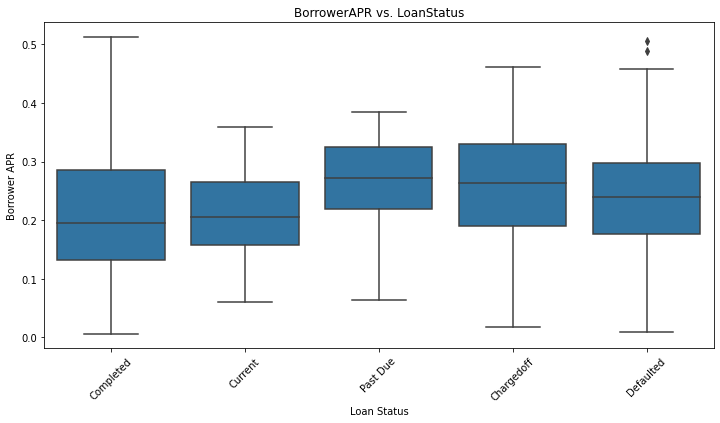

In [10]:
#The relationship between BorrowerAPR and LoanStatus
plt.figure(figsize = [12, 6])
base_color=sb.color_palette()[0]
sb.boxplot(data=loans,y='BorrowerAPR',x='LoanStatus',color=base_color);
plt.title('BorrowerAPR vs. LoanStatus');
plt.ylabel('Borrower APR');
plt.xlabel('Loan Status');
plt.xticks(rotation=45);

## JobStatus vs. LoanStatus | ProsperRating vs. LoanStatus | Term vs. LoanStatus

> JobStatus shows clear correlation with Loan Status for values like Employed, Self-employed, and Full-time. Especially Emloyed borrowers tend to get bigger loan amounts and lower APR rates than other types.
>
> ProsperRating shows negative correlation with Loan Status for some individual values. When ProsperRating moves from high rating to lower grades, loan Defaulted percentage goes in opposite direction. And other ProsperRating values did not show similar behaviors when interacting with Loan Status. 
>
>The Term feature appears to have some impacts on a loan's outcome, depending on certain values. As an example, Past Due or Chargedoff have higher APR across 12- to 60-month Terms. As mentiond earlier, APR is correlated with Loan Status, so the variable Term has influence on Loan Status, just like APR did.   

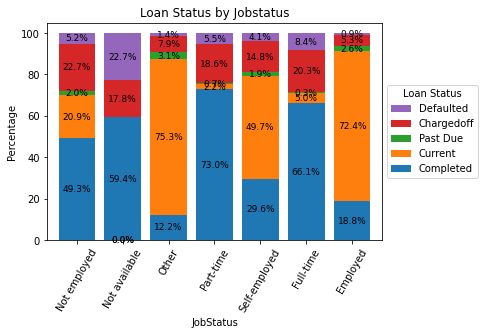

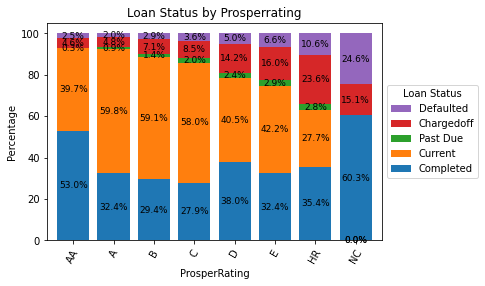

In [11]:
#Plot relationship between these variables and LoanStatus
def loan_stat(catVar, mainVar = 'LoanStatus'):
    df_rating=loans.groupby(catVar)[mainVar].value_counts(normalize = True).mul(100).unstack()
    ax=df_rating.plot.bar(stacked = True, rot = 0, width = 0.8)
    handles, labels = ax.get_legend_handles_labels() 
    ax.legend(reversed(handles),reversed(labels),loc='center left',bbox_to_anchor=(1, 0.5),title ='Loan Status')
    plt.xticks(rotation = 60)
    plt.ylabel('Percentage')
    plt.title('Loan Status by {}'.format(catVar.title()))
    for patch in ax.patches:
        plt.annotate(f"{patch.get_height():.1f}%",
                    (patch.get_x()+patch.get_width()/2, 
                     patch.get_y()+patch.get_height()/2), 
                     ha='center', va='center', color='black', fontsize=9)
    plt.show()

loan_stat('JobStatus')
loan_stat('ProsperRating')

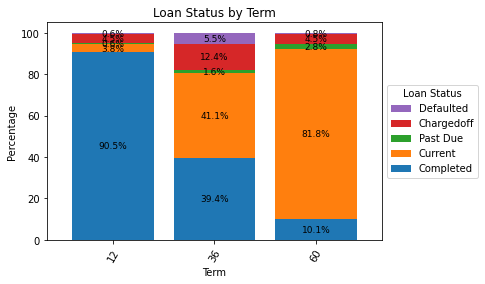

In [12]:
loan_stat('Term')

## Relationship between Loan Original Amount and BorrowerAPR and Loan Status 
The plot shows no clear pattern exhibits between Loan Original Amount and Loan Status. However, there is something interesting is shown between Loan Amount and BorrowerAPR for the Current status. The higher loan amount, the lower APR values are gathered.

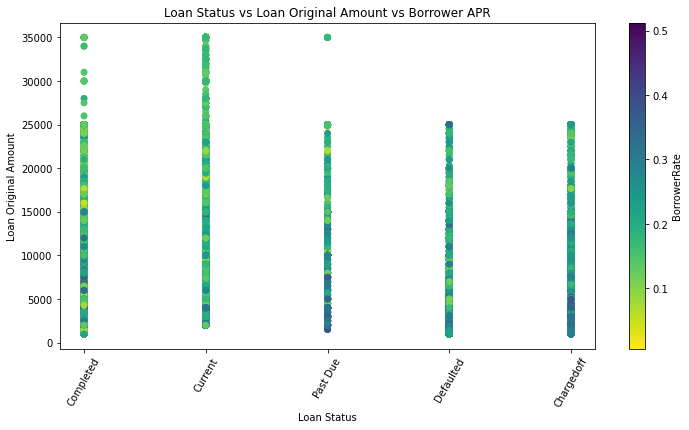

In [13]:
#LoanStatus vs BorrowerAPR vs Loan Original Amount
plt.figure(figsize = [12, 6])
plt.scatter(data=loans,x='LoanStatus',y='LoanAmount',c='BorrowerAPR',cmap='viridis_r')
plt.colorbar(label='BorrowerRate');
plt.title('Loan Status vs Loan Original Amount vs Borrower APR');
plt.xlabel('Loan Status');
plt.ylabel('Loan Original Amount');
plt.xticks(rotation=60);